<h2>Title: Predictive Analytics for Traffic Accident Prevention Using Machine Learning</h2>


The project aims to predict traffic accidents by analyzing factors like time, location, and weather. Using a machine learning model, it seeks to estimate collision probabilities, enabling authorities to take preventive measures, reduce accidents, optimize traffic management, and enhance road safety.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

<h2>Dataset Description</h2>
Source Link: <a href="https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction/data" target="_blank">
            Traffic Accident Prediction Dataset
        </a>

Dataset Description:
-  This dataset have 840 instances and 14 features
-  This is a classification problem. Because it predicts categories. Specifically for this         dataset it predicts accidents will happen or not based on the features the model is being provided in 1/0 format. That’s why it is considered a classification problem
- As this dataset contains 14 features it has 14 datapoints.
- We have 14 features in this dataset. Among them 10 are categorical and 4 are quantitative.

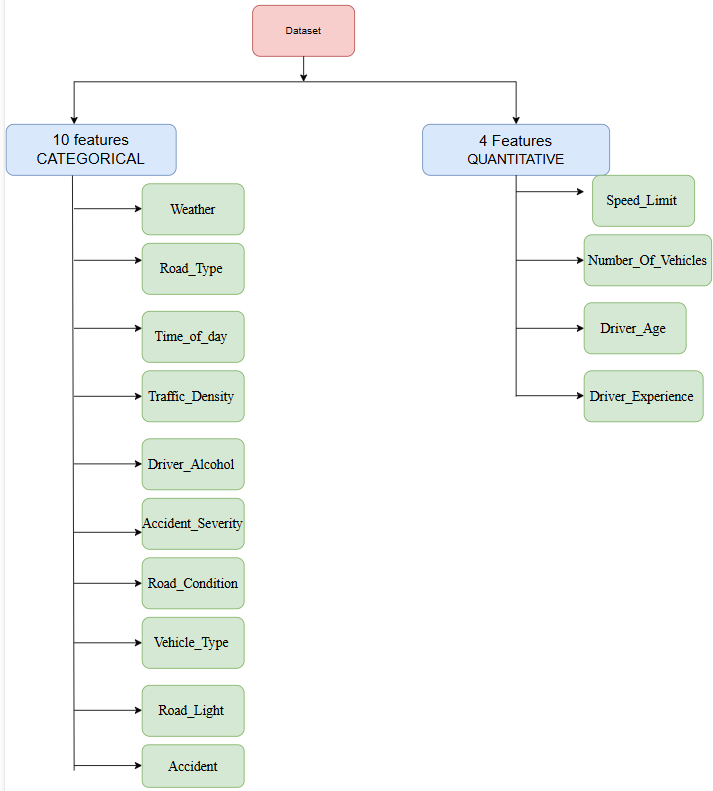





In [158]:
data = pd.read_csv('/content/dataset_traffic_accident_prediction1.csv') #load the Dataset
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


<h1><b> DATA EXPLORATION <b></h1>



       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.000000  
50%     43.000000 

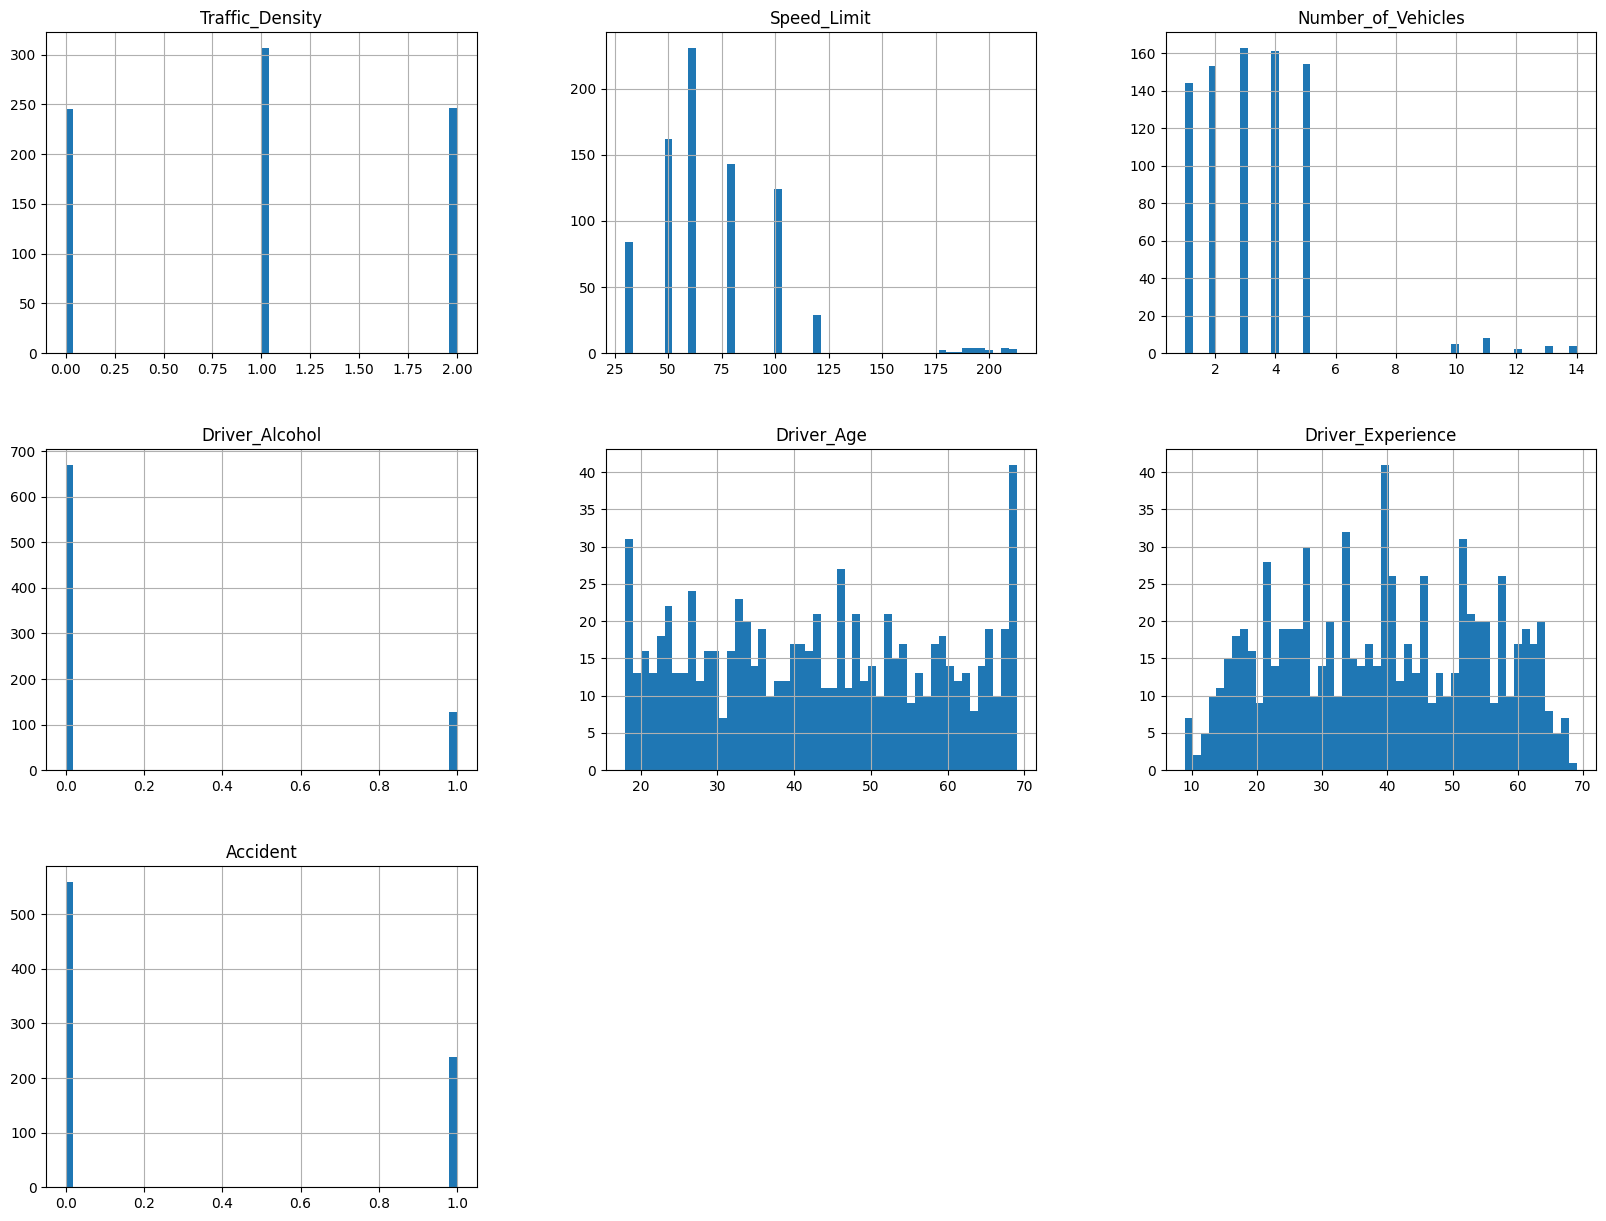

In [159]:
# Summary statistics
print(data.describe())

# Check for missing values
data.isnull().sum()

# Visualize distributions
data.hist(bins=50, figsize=(20,15))
plt.show()


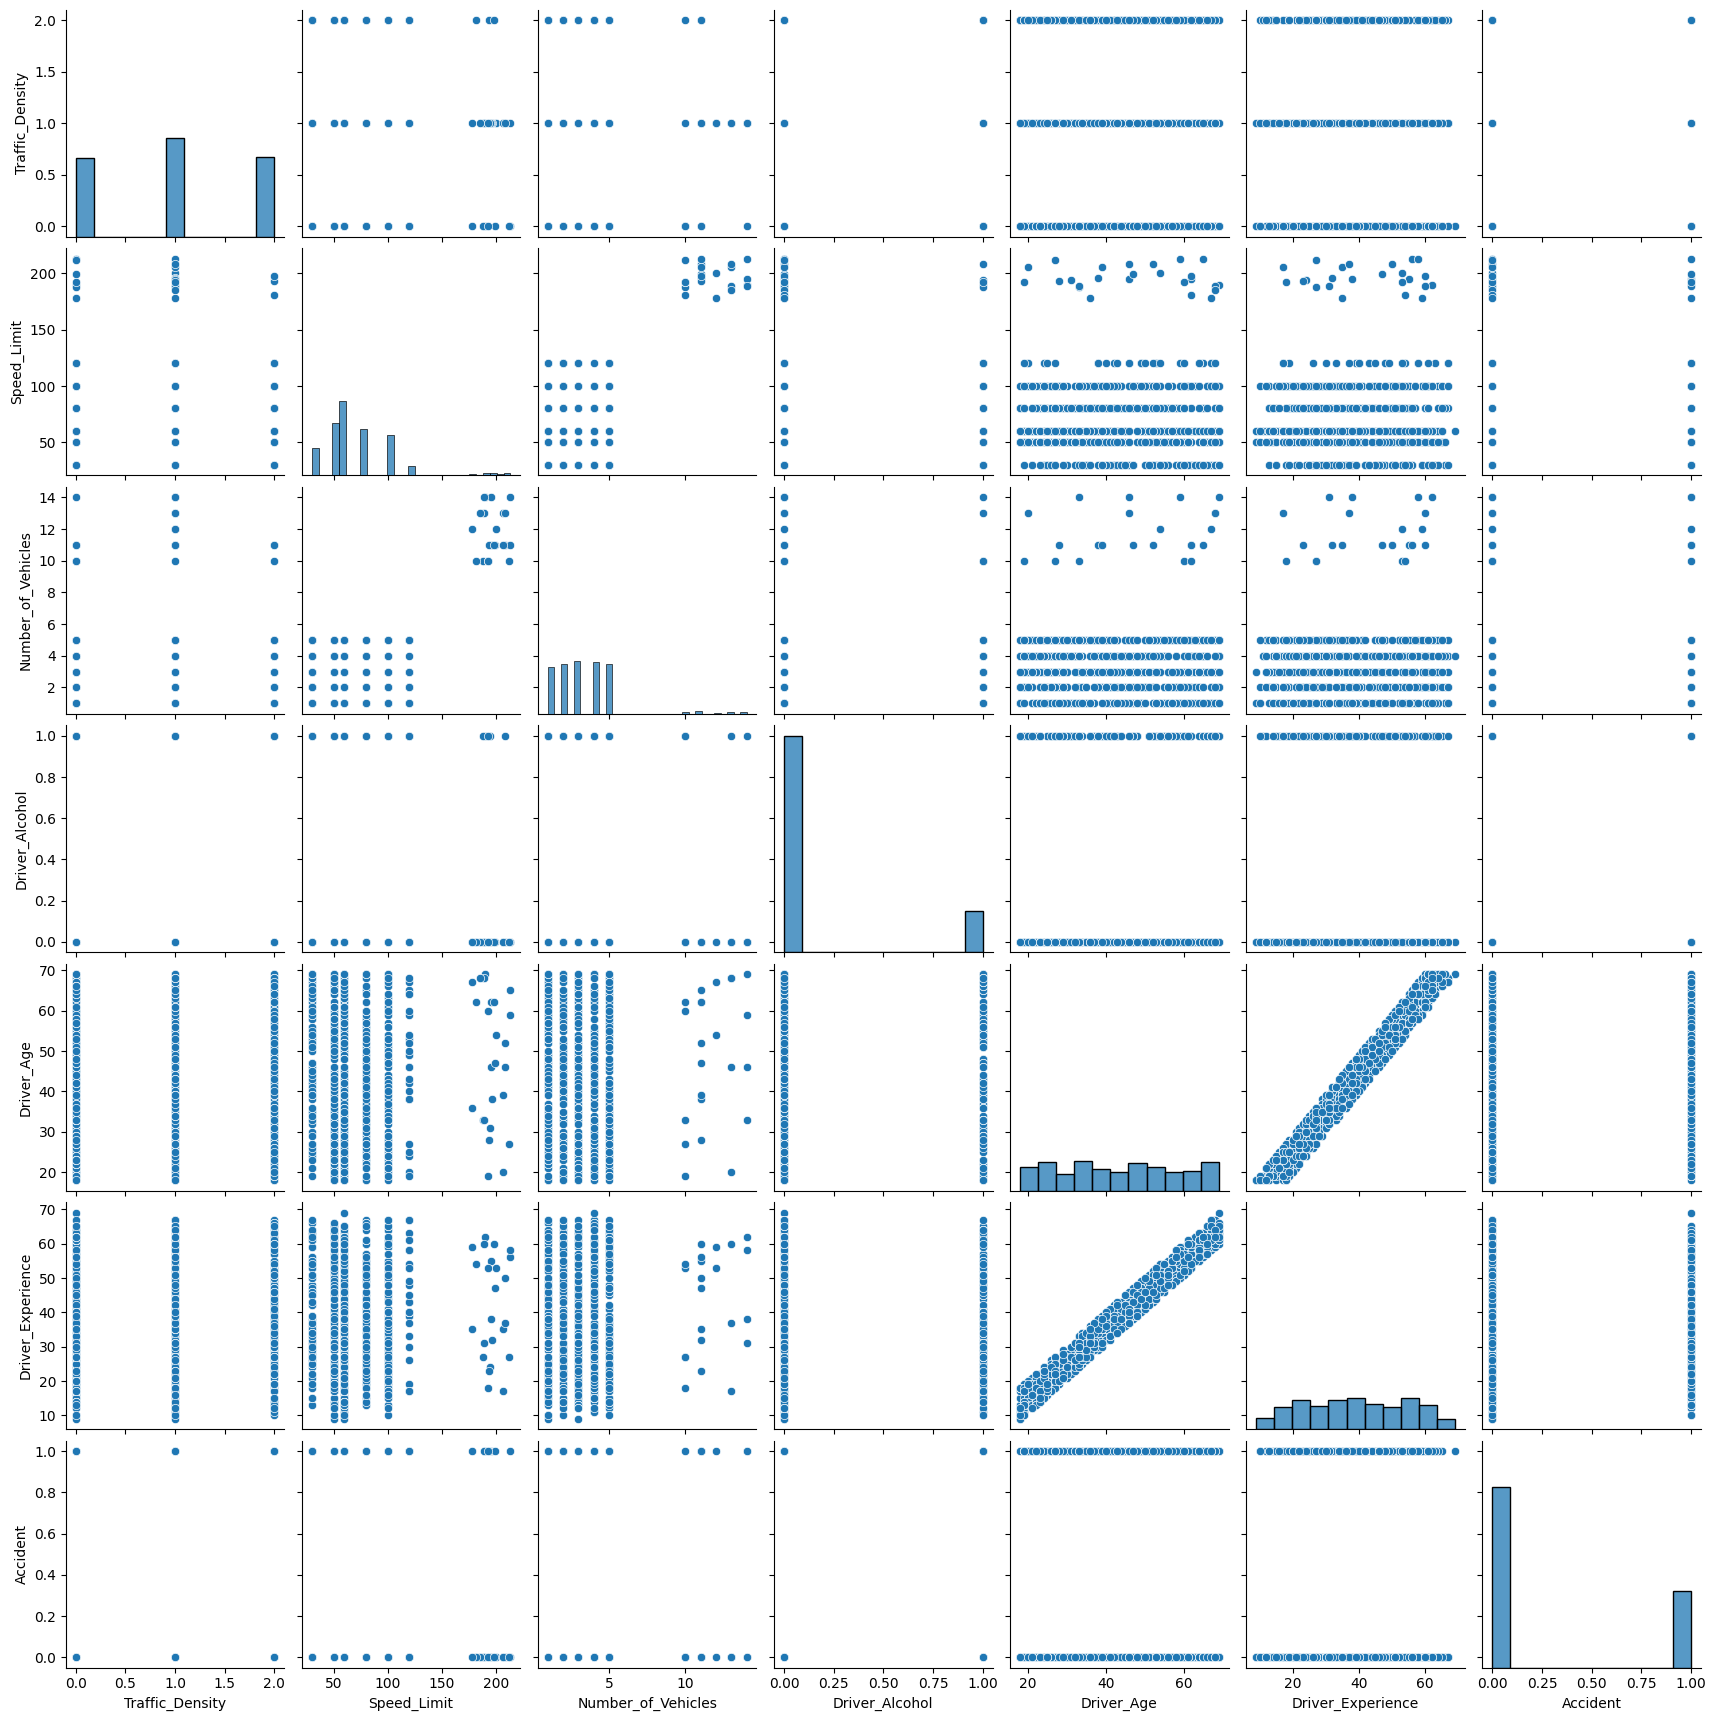

In [160]:
sns.pairplot(data)

In [161]:
data.shape #display the shape of the Dataset

(840, 14)

In [162]:
print(data.isnull().sum()) #Check for missing values in the Dataset

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64


<h2>HANDLE MISSING VALUES</h2>

We have 42 null values in each of the features. If we drop each of the instances carrying
             null values will unnecessarily reduce the dataset size. So, we have used <b>median</b>
             imputation in those features carrying quantitative values. So, that any kind of outliers
             don’t impact the values used to impute the null values with.
            <b> Mode imputation</b> is used in
             features carrying categorical values.


In [163]:

print("Missing Values:\n", data.isnull().sum())

# Fill missing numerical values with median
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill missing categorical values with mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

print("Missing Values After Filling:\n", data.isnull().sum())

Missing Values:
 Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64
Missing Values After Filling:
 Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


<h2>DULICATES REMOVE</h2>

In [164]:
data = data.drop_duplicates() #Remove duplicate rows from dataset
data

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,1.0,30.0,4.0,1.0,High,Dry,Car,43.0,34.0,Artificial Light,0.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


<h2>CLASS DISTRIBUTION</h2>

In [165]:
target_column = 'Accident'

class_distribution = data[target_column].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Accident
0.0    589
1.0    233
Name: count, dtype: int64


 <h1> Dataset Spliting</h1>
  We have splitted the dataset into 70-30. Meaning for training we have used 70% of the data and for testing we have used 30% of the data.


In [166]:
# Percentage distribution of each class
class_percentage = (class_distribution / len(data)) * 100
print("\nPercentage Distribution:")
print(class_percentage)



Percentage Distribution:
Accident
0.0    71.654501
1.0    28.345499
Name: count, dtype: float64


<h1>There are two classes in the output feature. One is 0, another one is 1. Class 0 has 575 instances and class 1 has 247 instances.</h1>

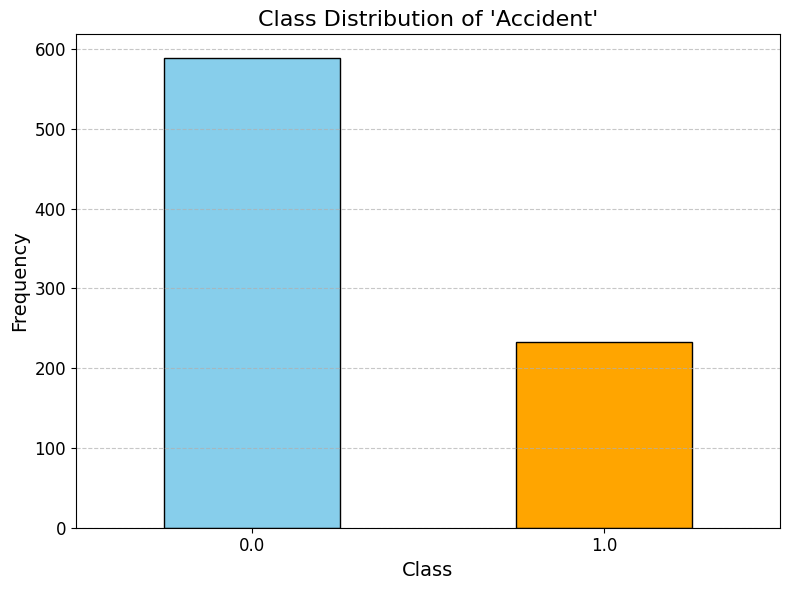

In [167]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title("Class Distribution of 'Accident'", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>HANDLE CATAGORICAL VALUES</h1>

  There are categorical value in 10 features and  most of the machine learning model can’t work    
  with the categorical variable. So, we have to convert them into numeric or binary values.
  Except for the Driver_Alcohol each of the categorical features in this dataset have more than
  2 unique classes. So, we have to use <b>One-Hot Encoding</b> here.


In [168]:
# Define categorical columns
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity','Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

# Check the shape of the new dataset
print("Original dataset shape:", data.shape)
print("Transformed dataset shape:", data_encoded.shape)

# Convert boolean columns to integers
data_encoded = data_encoded.astype(int)

# Check the transformed dataset
#print(data_encoded.dtypes)
print(data_encoded.head())

Original dataset shape: (822, 14)
Transformed dataset shape: (822, 34)
   Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
0                1          100                   5               0   
1                1          120                   3               0   
2                1           60                   4               0   
3                2           60                   3               0   
4                1          195                  11               0   

   Driver_Age  Driver_Experience  Accident  Weather_Clear  Weather_Foggy  \
0          51                 48         0              0              0   
1          49                 43         0              1              0   
2          54                 52         0              0              0   
3          34                 31         0              1              0   
4          62                 55         1              0              0   

   Weather_Rainy  ...  Road_Condition_Icy  Ro

<h1>FEATURE SELECTION</h1>

We use <b>FEATURE SELECTION</b> process to identify and remove highly correlated features to avoid redundancy and multicollinearity in the dataset.

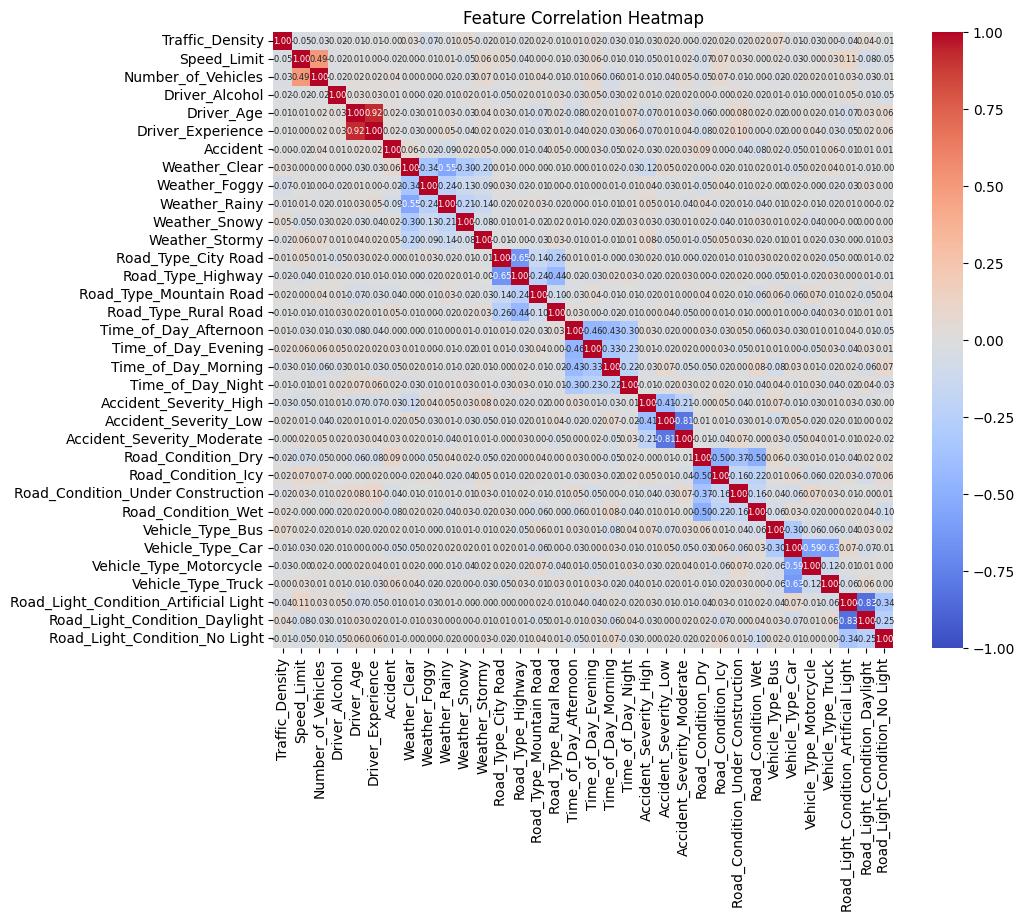

Highly Correlated Feature Pairs:
('Driver_Age', 'Driver_Experience')
('Driver_Experience', 'Driver_Age')
('Accident_Severity_Low', 'Accident_Severity_Moderate')
('Accident_Severity_Moderate', 'Accident_Severity_Low')
('Road_Light_Condition_Artificial Light', 'Road_Light_Condition_Daylight')
('Road_Light_Condition_Daylight', 'Road_Light_Condition_Artificial Light')


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Experience,Accident,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,...,Road_Condition_Dry,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Artificial Light,Road_Light_Condition_No Light
0,1,100,5,0,48,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,1,120,3,0,43,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,1,60,4,0,52,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,2,60,3,0,31,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,195,11,0,55,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [169]:
correlation_matrix = data_encoded.corr()
correlation_matrix

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, annot_kws={'size':6})
plt.title("Feature Correlation Heatmap")
plt.show()

threshold = 0.8
correlation_matrix = data_encoded.corr()

# Find pairs of features with correlation above the threshold
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if (col1 != col2) and (abs(correlation_matrix.loc[col1, col2]) > threshold)]

print("Highly Correlated Feature Pairs:")
for pair in high_corr_pairs:
    print(pair)

to_drop= 'Driver_Age'
data_encoded=data_encoded.drop(to_drop, axis=1)



to_drop= 'Accident_Severity_Moderate'
data_encoded=data_encoded.drop(to_drop, axis=1)



to_drop= 'Road_Light_Condition_Daylight'
data_encoded=data_encoded.drop(to_drop, axis=1)
data_encoded.head()

<h1>DATA SPLITING</h1>

In [170]:
X = data_encoded.drop('Accident', axis=1)
y = data_encoded['Accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the split dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training set size: 575
Test set size: 247
X_train shape: (575, 30)
y_train shape: (575,)
X_test shape: (247, 30)
y_test shape: (247,)


<h1>FEATURE SCALING</h1>
In our dataset, we have to do feature scale in the Speed_Limit, Number_Of_Vehicles,
Driver_age named feature to ensure that all numerical features in the dataset are on a
comparable scale and to prevent bias in the model. And we have used <b>Robust Scaler </b>
technique  because Robust scaling uses the <b>MEDIAN</b> and <b>IQR</b> instead of the mean and
standard deviation, making it resistant to outliers. Outliers have little impact on the    
scaling process, so this method is ideal for datasets with significant outliers  


In [171]:
from sklearn.preprocessing import RobustScaler
# # Identify columns that do not need scaling (binary or one-hot encoded columns)
non_scaling_cols = [col for col in X_train.columns if set(X_train[col].unique()).issubset({0, 1, 2})]


# # Identify columns that need scaling
scaling_cols = [col for col in X_train.columns if col not in non_scaling_cols]


# Scale the numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = RobustScaler()

X_train_scaled[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_test_scaled[scaling_cols] = scaler.transform(X_test[scaling_cols])

# Display shapes and a preview of scaled data
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled.head())


print("Scaled Testing Data (first 5 rows):")
print(X_test_scaled.head())

Scaled Training Data (first 5 rows):
     Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
214                2     0.000000                -1.0               1   
775                1     0.000000                 0.0               0   
494                0    -0.333333                -0.5               0   
21                 0     1.333333                 1.0               0   
666                1     0.666667                -0.5               0   

     Driver_Experience  Weather_Clear  Weather_Foggy  Weather_Rainy  \
214          -0.307692              1              0              0   
775          -0.307692              0              0              0   
494           0.846154              0              0              0   
21           -0.576923              0              1              0   
666          -0.538462              0              1              0   

     Weather_Snowy  Weather_Stormy  ...  Road_Condition_Dry  \
214              0               0

<h1><b>MODEL TRAINING AND TESTING</b></h1>

From the available models we have decided to use<br>
1.Random Forest<br>
2.Naive Bayes<br>
3.Decision Tree


In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

<h1>RANDOM FOREST</h1>

1. While a single decision tree is easy to interpret, it may not perform as well on its own.  Random Forest improves upon decision trees by reducing variance and  preventing overfitting, which typically leads to better accuracy and prediction.<br>
2. Random Forest is robust to outliers and can handle missing data better than  many other algorithms.<br>
3.  Random Forest is an ensemble method that combines multiple decision trees to make a more robust prediction



In [173]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model and display metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)


print("Random Forest RMSE:", forest_rmse_scores.mean())

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Random Forest RMSE: 0.4840169449928761
Accuracy: 0.72
Precision: 0.22
Recall: 0.09
F1 Score: 0.13


In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7206477732793523
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       191
           1       0.22      0.09      0.13        56

    accuracy                           0.72       247
   macro avg       0.49      0.50      0.48       247
weighted avg       0.65      0.72      0.67       247



In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_features': [4, 6, 8]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_features': 4, 'n_estimators': 100}


<h1>Feature Importance Plot</h1>
Feature importance in Random Forest helps understand which features have the most impact on predictions.


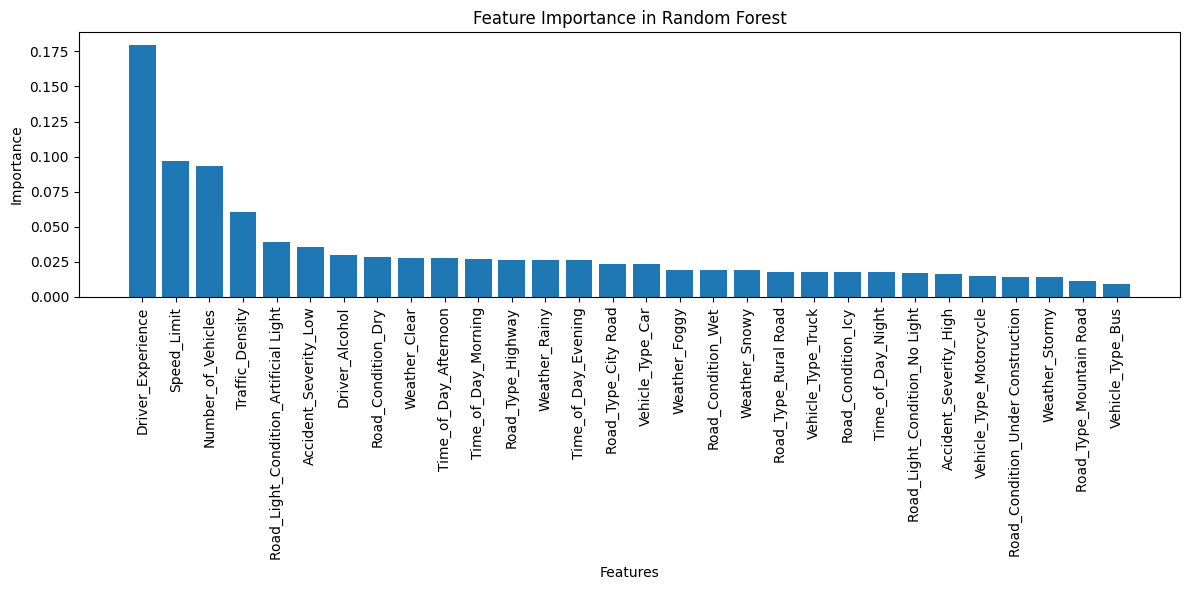

In [188]:


import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h1>NAIVE BAYES</h1>
              1. Naive Bayes is computationally efficient and simple. It works well with lots of   
                  feature which we have <br>
              2. Naive Bayes assumes features are conditionally independent, in our dataset we have
                  checked correlation and if we find 0.8 or high correlation among two feature we           
                  Simply drop one feature. So we can assume the conditional independence here<br>
               3. Naive Bayes works well with imbalanced data. As we have imbalanced data
                   in the dataset , we can use here


In [189]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')  # Adjust 'average' if needed
recall = recall_score(y_test, y_pred_nb, average='weighted')        # Adjust 'average' if needed
f1 = f1_score(y_test, y_pred_nb, average='weighted')                # Adjust 'average' if needed

# Display the results
print("Naive Bayes Evaluation Metrics")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Naive Bayes Evaluation Metrics
Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1 Score: 0.66


<h1>DECISION TREE</h1>
1. Decision Tree is highly interpretable. We can easily trace the logic behind the   
                    decision making process. <br>
                2. Decision Tree can capture nonlinear relationships between features.<br>
                3.  A decision tree will inherently select the most important features for classification
                     and split the data based on these features.


In [190]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')  # Adjust 'average' if needed
recall = recall_score(y_test, y_pred_dt, average='weighted')        # Adjust 'average' if needed
f1 = f1_score(y_test, y_pred_dt, average='weighted')                # Adjust 'average' if needed

# Display the results
print("Decision Tree Evaluation Metrics")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Decision Tree Evaluation Metrics
Accuracy: 0.60
Precision: 0.64
Recall: 0.60
F1 Score: 0.62


<h1>Classifier Accuracy Comparison</h1>

The metrics used to evaluate the performance of the models are:


  (i) Accuracy Score: This is the most common metric and represents the overall correctness    of the model's predictions. It is the ratio of correctly predicted instances to the total number of instances   
       
  (ii) Precision Score: This metric focuses on the accuracy of positive predictions. It is the ratio of correctly predicted positive instances to the total predicted positive instances.
  (iii) Recall Score: This metric measures the ability of the model to identify all positive instances. It is the ratio of correctly predicted positive instances to the total actual positive instances.    

   (iv) F1 Score: This is a harmonic mean of precision and recall, providing a balanced measure of both metrics. It is useful when both false positives and false negatives are to be considered.            


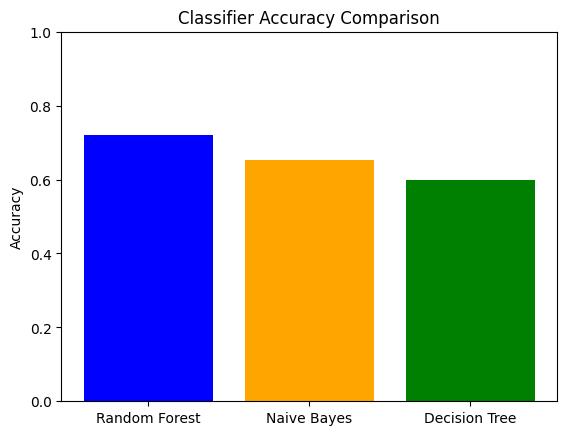

In [191]:
import matplotlib.pyplot as plt

# Accuracy values for each classifier
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_dt)]

# Classifier names
classifiers = ['Random Forest', 'Naive Bayes', 'Decision Tree']

# Plot the bar chart
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green'])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

# Show the plot
plt.show()

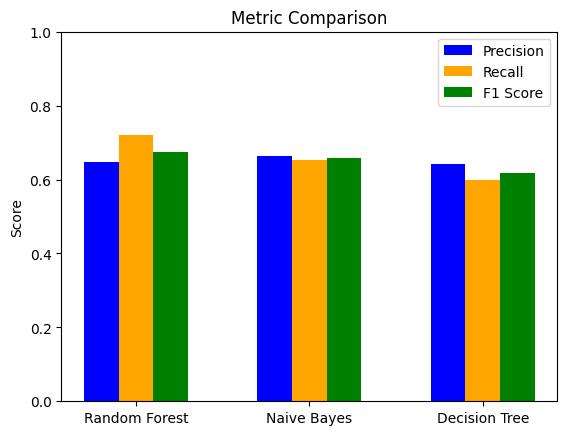

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each classifier
precision = [precision_score(y_test, y_pred, average='weighted'),
             precision_score(y_test, y_pred_nb, average='weighted'),
             precision_score(y_test, y_pred_dt, average='weighted')]

recall = [recall_score(y_test, y_pred, average='weighted'),
          recall_score(y_test, y_pred_nb, average='weighted'),
          recall_score(y_test, y_pred_dt, average='weighted')]

f1 = [f1_score(y_test, y_pred, average='weighted'),
      f1_score(y_test, y_pred_nb, average='weighted'),
      f1_score(y_test, y_pred_dt, average='weighted')]

classifiers = ['Random Forest', 'Naive Bayes', 'Decision Tree']

# Bar chart
x = np.arange(len(classifiers))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='orange')
plt.bar(x + 0.2, f1, width=0.2, label='F1 Score', color='green')

# Formatting
plt.xticks(x, classifiers)
plt.ylabel('Score')
plt.title('Metric Comparison')
plt.ylim(0, 1)
plt.legend()

plt.show()


<h1>Confusion Matrix</h1>
In our model, High recall is important when missing an accident (false negatives) could have serious consequences, such as when trying to predict potential accidents that need timely intervention or preventive measures. So, we will use Random Forest as it has the highest recall score 72%.

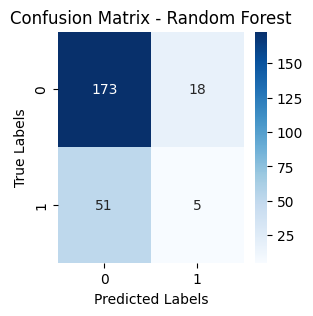

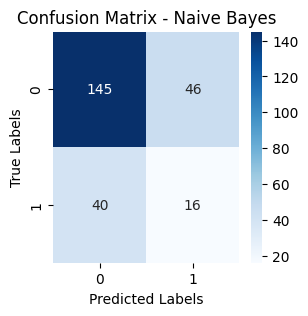

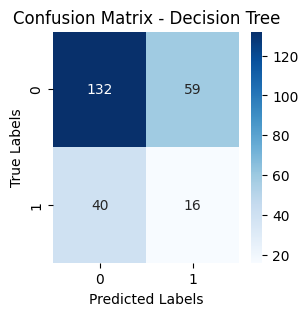

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)  # Random Forest
cm_nb = confusion_matrix(y_test, y_pred_nb)  # Naive Bayes
cm_dt = confusion_matrix(y_test, y_pred_dt)  # Decision Tree

# Plot confusion matrix for Random Forest
plt.figure(figsize=(3, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(3, 3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(3, 3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


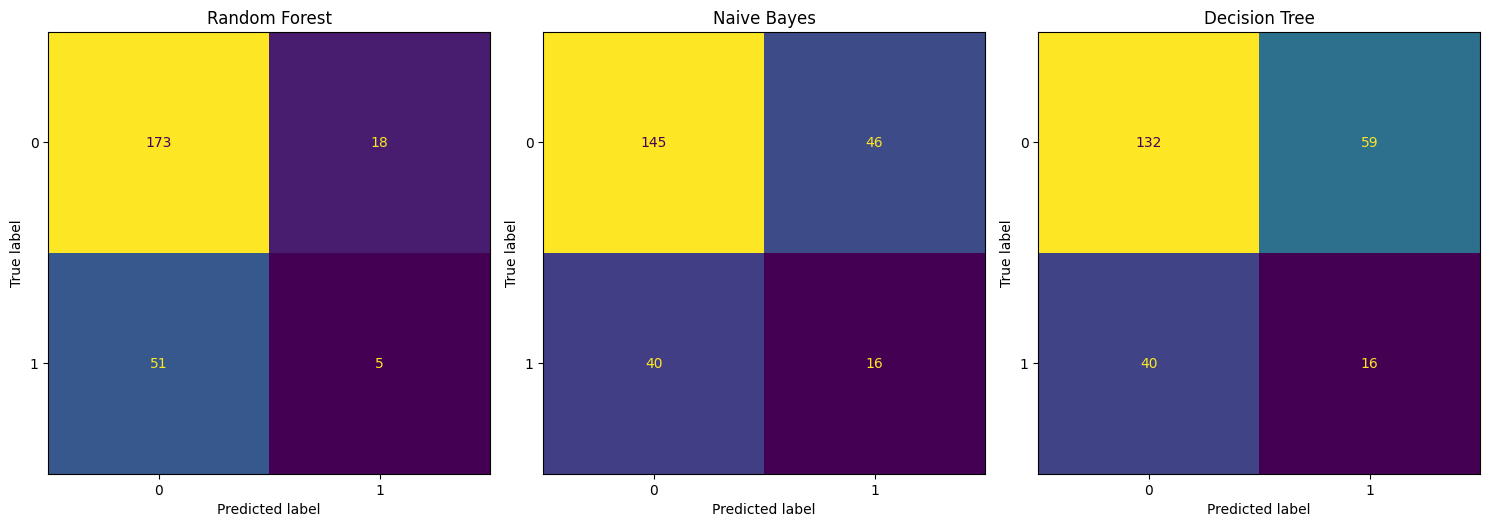

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Classifier names
classifiers = ['Random Forest', 'Naive Bayes', 'Decision Tree']
confusion_matrices = [cm_rf, cm_nb, cm_dt]

# Plotting confusion matrices
plt.figure(figsize=(15, 5))

for i, (name, cm) in enumerate(zip(classifiers, confusion_matrices)):
    plt.subplot(1, 3, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=plt.gca(), colorbar=False)
    plt.title(name)

plt.tight_layout()
plt.show()


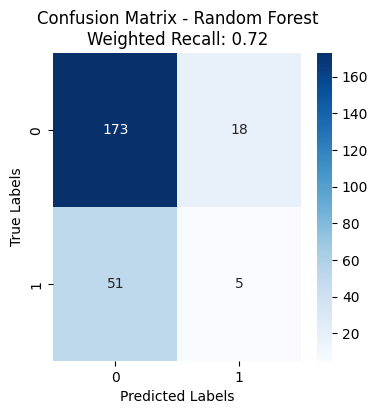

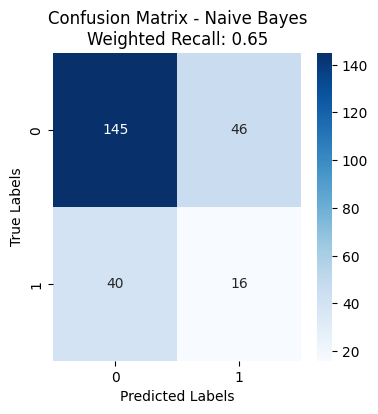

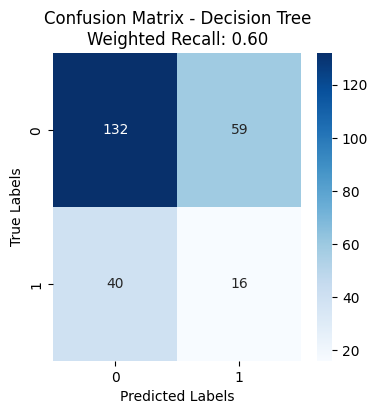

In [195]:
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)  # Random Forest
cm_nb = confusion_matrix(y_test, y_pred_nb)  # Naive Bayes
cm_dt = confusion_matrix(y_test, y_pred_dt)  # Decision Tree

# Function to calculate class-specific recall
def calculate_class_recall(cm):
    recalls = []
    for i in range(len(cm)):
        tp = cm[i, i]  # True Positives
        fn = sum(cm[i, :]) - tp  # False Negatives
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        recalls.append(recall)
    return recalls

# Function to calculate weighted recall
def calculate_weighted_recall(cm, y_test):
    recalls = calculate_class_recall(cm)
    support = np.sum(cm, axis=1)  # Support (true samples per class)
    weighted_recall = np.sum([recalls[i] * support[i] for i in range(len(recalls))]) / len(y_test)
    return recalls, weighted_recall

# Random Forest
rf_recalls, rf_weighted_recall = calculate_weighted_recall(cm_rf, y_test)

# Naive Bayes
nb_recalls, nb_weighted_recall = calculate_weighted_recall(cm_nb, y_test)

# Decision Tree
dt_recalls, dt_weighted_recall = calculate_weighted_recall(cm_dt, y_test)

# Plot confusion matrices and weighted recall
models = ['Random Forest', 'Naive Bayes', 'Decision Tree']
confusion_matrices = [cm_rf, cm_nb, cm_dt]
weighted_recalls = [rf_weighted_recall, nb_weighted_recall, dt_weighted_recall]

for i, (model, cm, w_recall) in enumerate(zip(models, confusion_matrices, weighted_recalls)):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model}\nWeighted Recall: {w_recall:.2f}')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
